In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.style import use
use('seaborn')

# 中文乱码
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA

In [4]:
# 删除空变量
data = pd.read_csv('C:/pwork/上海餐饮数据.csv')
data = data.drop(['Unnamed: 10', 'Unnamed: 11', '城市'], axis=1)

In [30]:
# data.shape
# data.isnull().sum()
# data.columns
# data01.describe()
# 获取有点评的餐厅
data01 = data[(data['点评数'] != 0) & (data['口味'] != 0) & (data['人均消费'] != 0) & (data['Lng'] > 120)]
# (data['点评数'] != 0) & (data['口味'] != 0)

In [31]:
# data01.isnull().sum()
data_dropna = data01.dropna()

data02 = pd.get_dummies(data_dropna)
data02.describe()

,点评数,口味,环境,服务,人均消费,Lng,Lat,类别_亚菜,类别_助餐,类别_北菜,...,行政区_ 松江区,行政区_ 浦东新区,行政区_ 虹口区,行政区_ 金山区,行政区_ 长宁区,行政区_ 闵行区,行政区_ 闸北区,行政区_ 青浦区,行政区_ 静安区,行政区_ 黄浦区
count,54875.000000,54875.000000,54875.000000,54875.000000,54875.000000,54875.000000,54875.000000,54875.000000,54875.000000,54875.000000,...,54875.000000,54875.000000,54875.000000,54875.000000,54875.000000,54875.000000,54875.000000,54875.000000,54875.000000,54875.000000
mean,711.386879,7.589053,7.570172,7.532326,72.664601,121.431527,31.218687,0.008674,0.011098,0.014579,...,0.055472,0.154169,0.045631,0.000036,0.073057,0.102688,0.045194,0.030961,0.060173,0.057057
std,1844.254094,0.615022,0.704133,0.671882,106.711592,0.111255,0.080592,0.092732,0.104762,0.119860,...,0.228900,0.361114,0.208685,0.006037,0.260232,0.303554,0.207730,0.173214,0.237809,0.231954
min,1.000000,4.000000,3.800000,4.200000,1.000000,120.879630,30.733726,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,7.100000,7.100000,7.100000,24.000000,121.387594,31.186274,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,129.000000,7.500000,7.500000,7.400000,45.000000,121.442901,31.225007,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,553.000000,8.000000,8.000000,8.000000,87.000000,121.486729,31.262165,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,38643.000000,9.400000,9.400000,9.500000,6309.000000,121.967860,31.721867,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
data010.to_csv('shanghai.csv', encoding='utf_8_sig')

# 前处理

## 1. 因变量

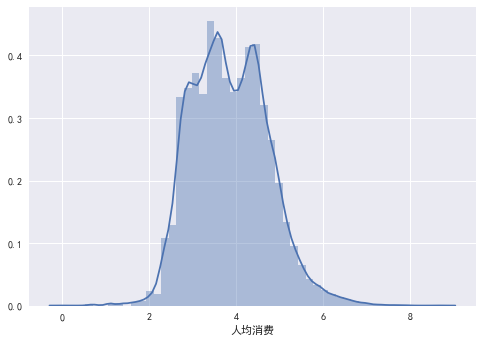

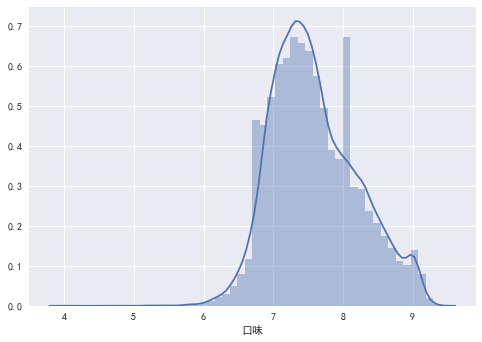

In [32]:
sns.distplot(np.log(data02['人均消费']));plt.show()
sns.distplot(data02['口味']);plt.show()

## 2. 类别变量

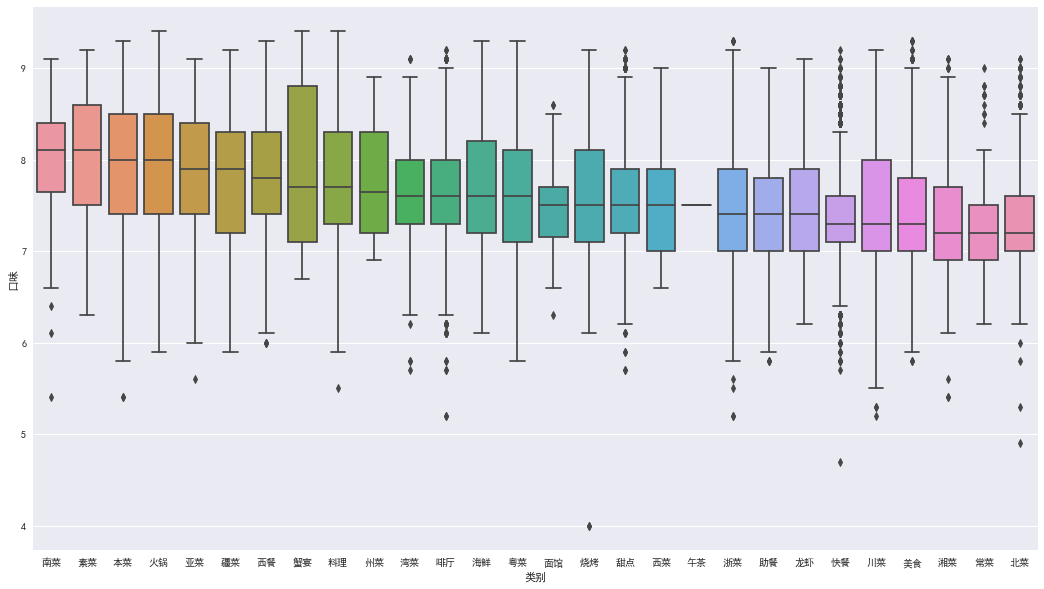

In [34]:
my_order = data01.groupby(by=["类别"])["口味"].median().sort_values(ascending=False).index
f, ax = plt.subplots(figsize=(18, 10))
fig = sns.boxplot(x='类别', y='口味', data=data01, order=my_order)
# fig.axis(ymin=0, ymax=800000);

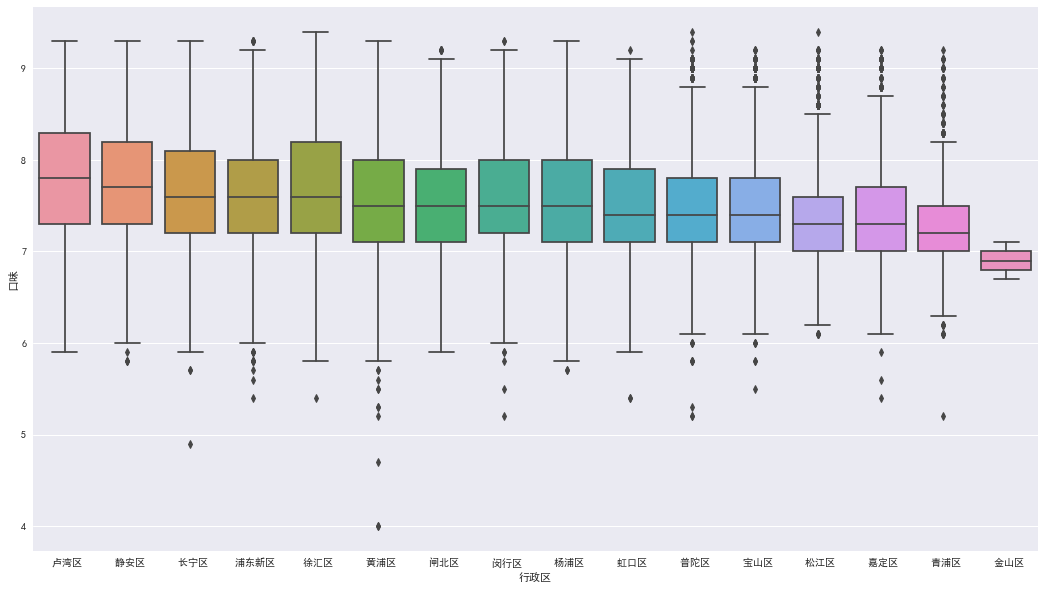

In [43]:
my_order = data01.groupby(by=["行政区"])["口味"].median().sort_values(ascending=False).index

f, ax = plt.subplots(figsize=(18, 10))
fig = sns.boxplot(x='行政区', y='口味', data=data01, order=my_order)
# fig.axis(ymin=0, ymax=800000);

## 3. 相关性

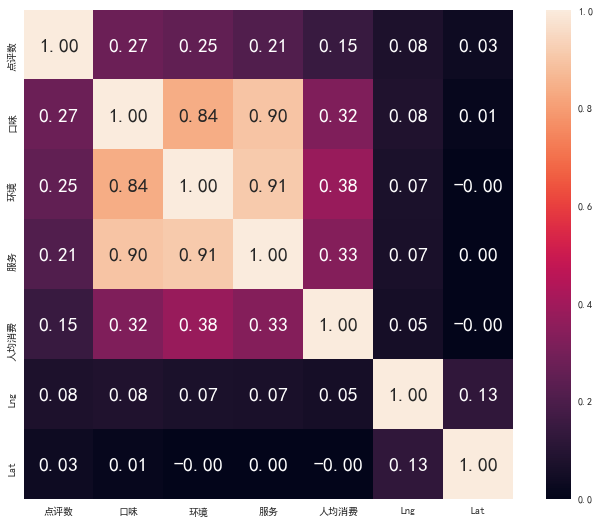

In [36]:
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(data01.corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 20},
                )

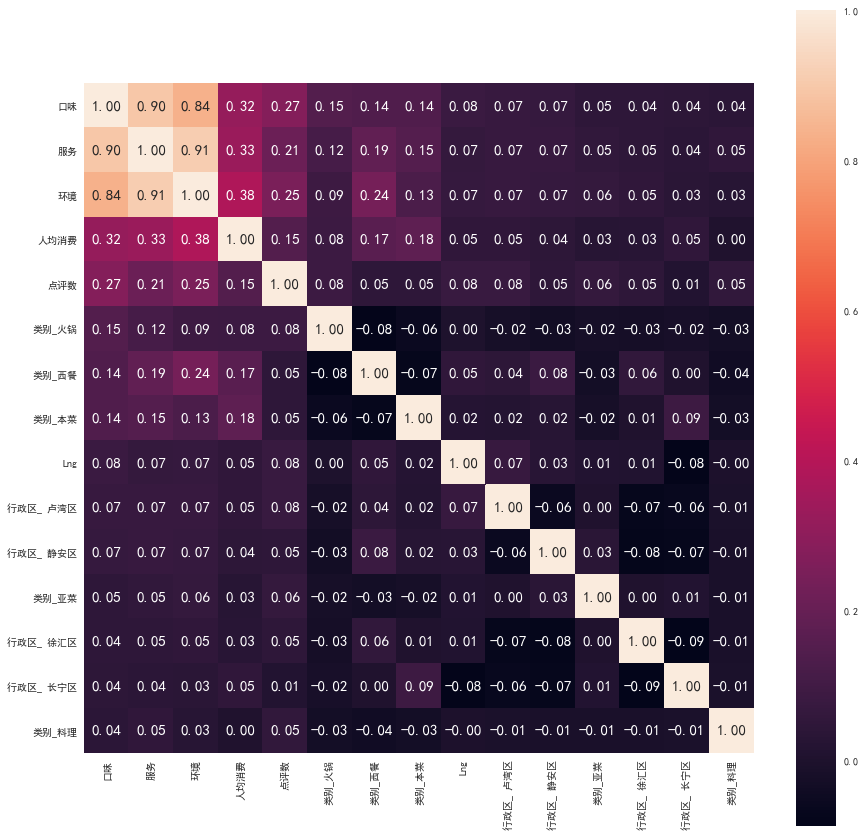

In [40]:
k = 15
cols = data02.corr()['口味'].sort_values(ascending=False).index[:k]

f, ax = plt.subplots(figsize=(15, 15))
hm = sns.heatmap(data02[cols].corr(), cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15},
                )

c:\users\13631\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


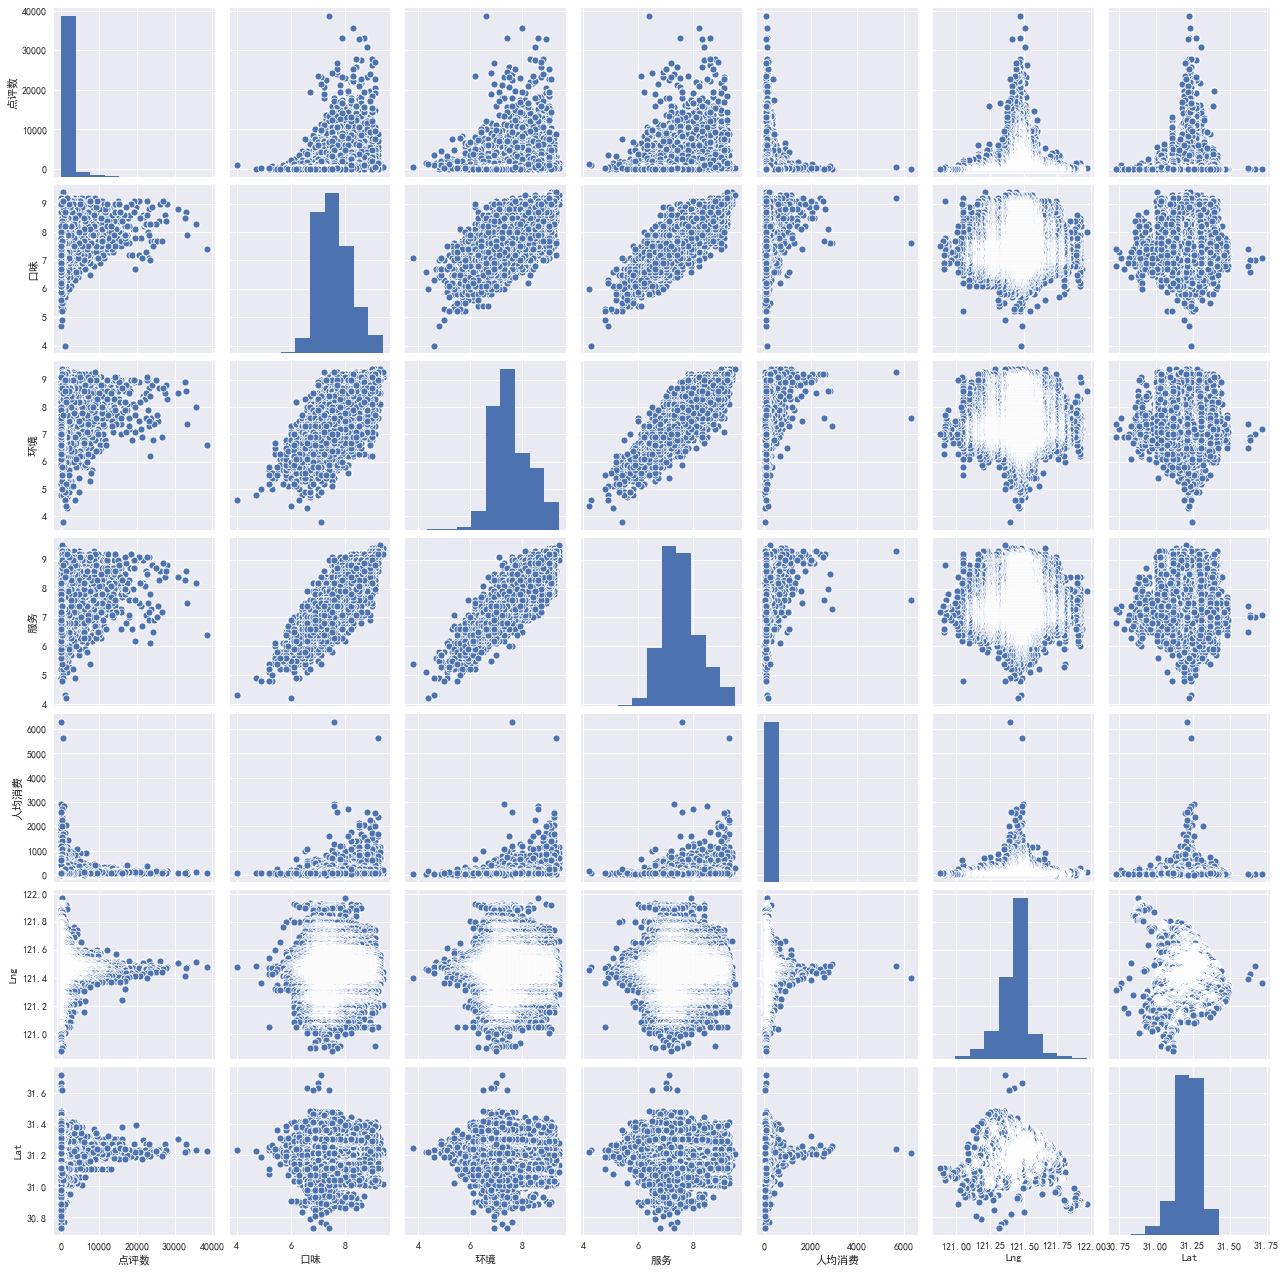

In [38]:
sns.pairplot(data01, size=2.5)

## 4. 地图

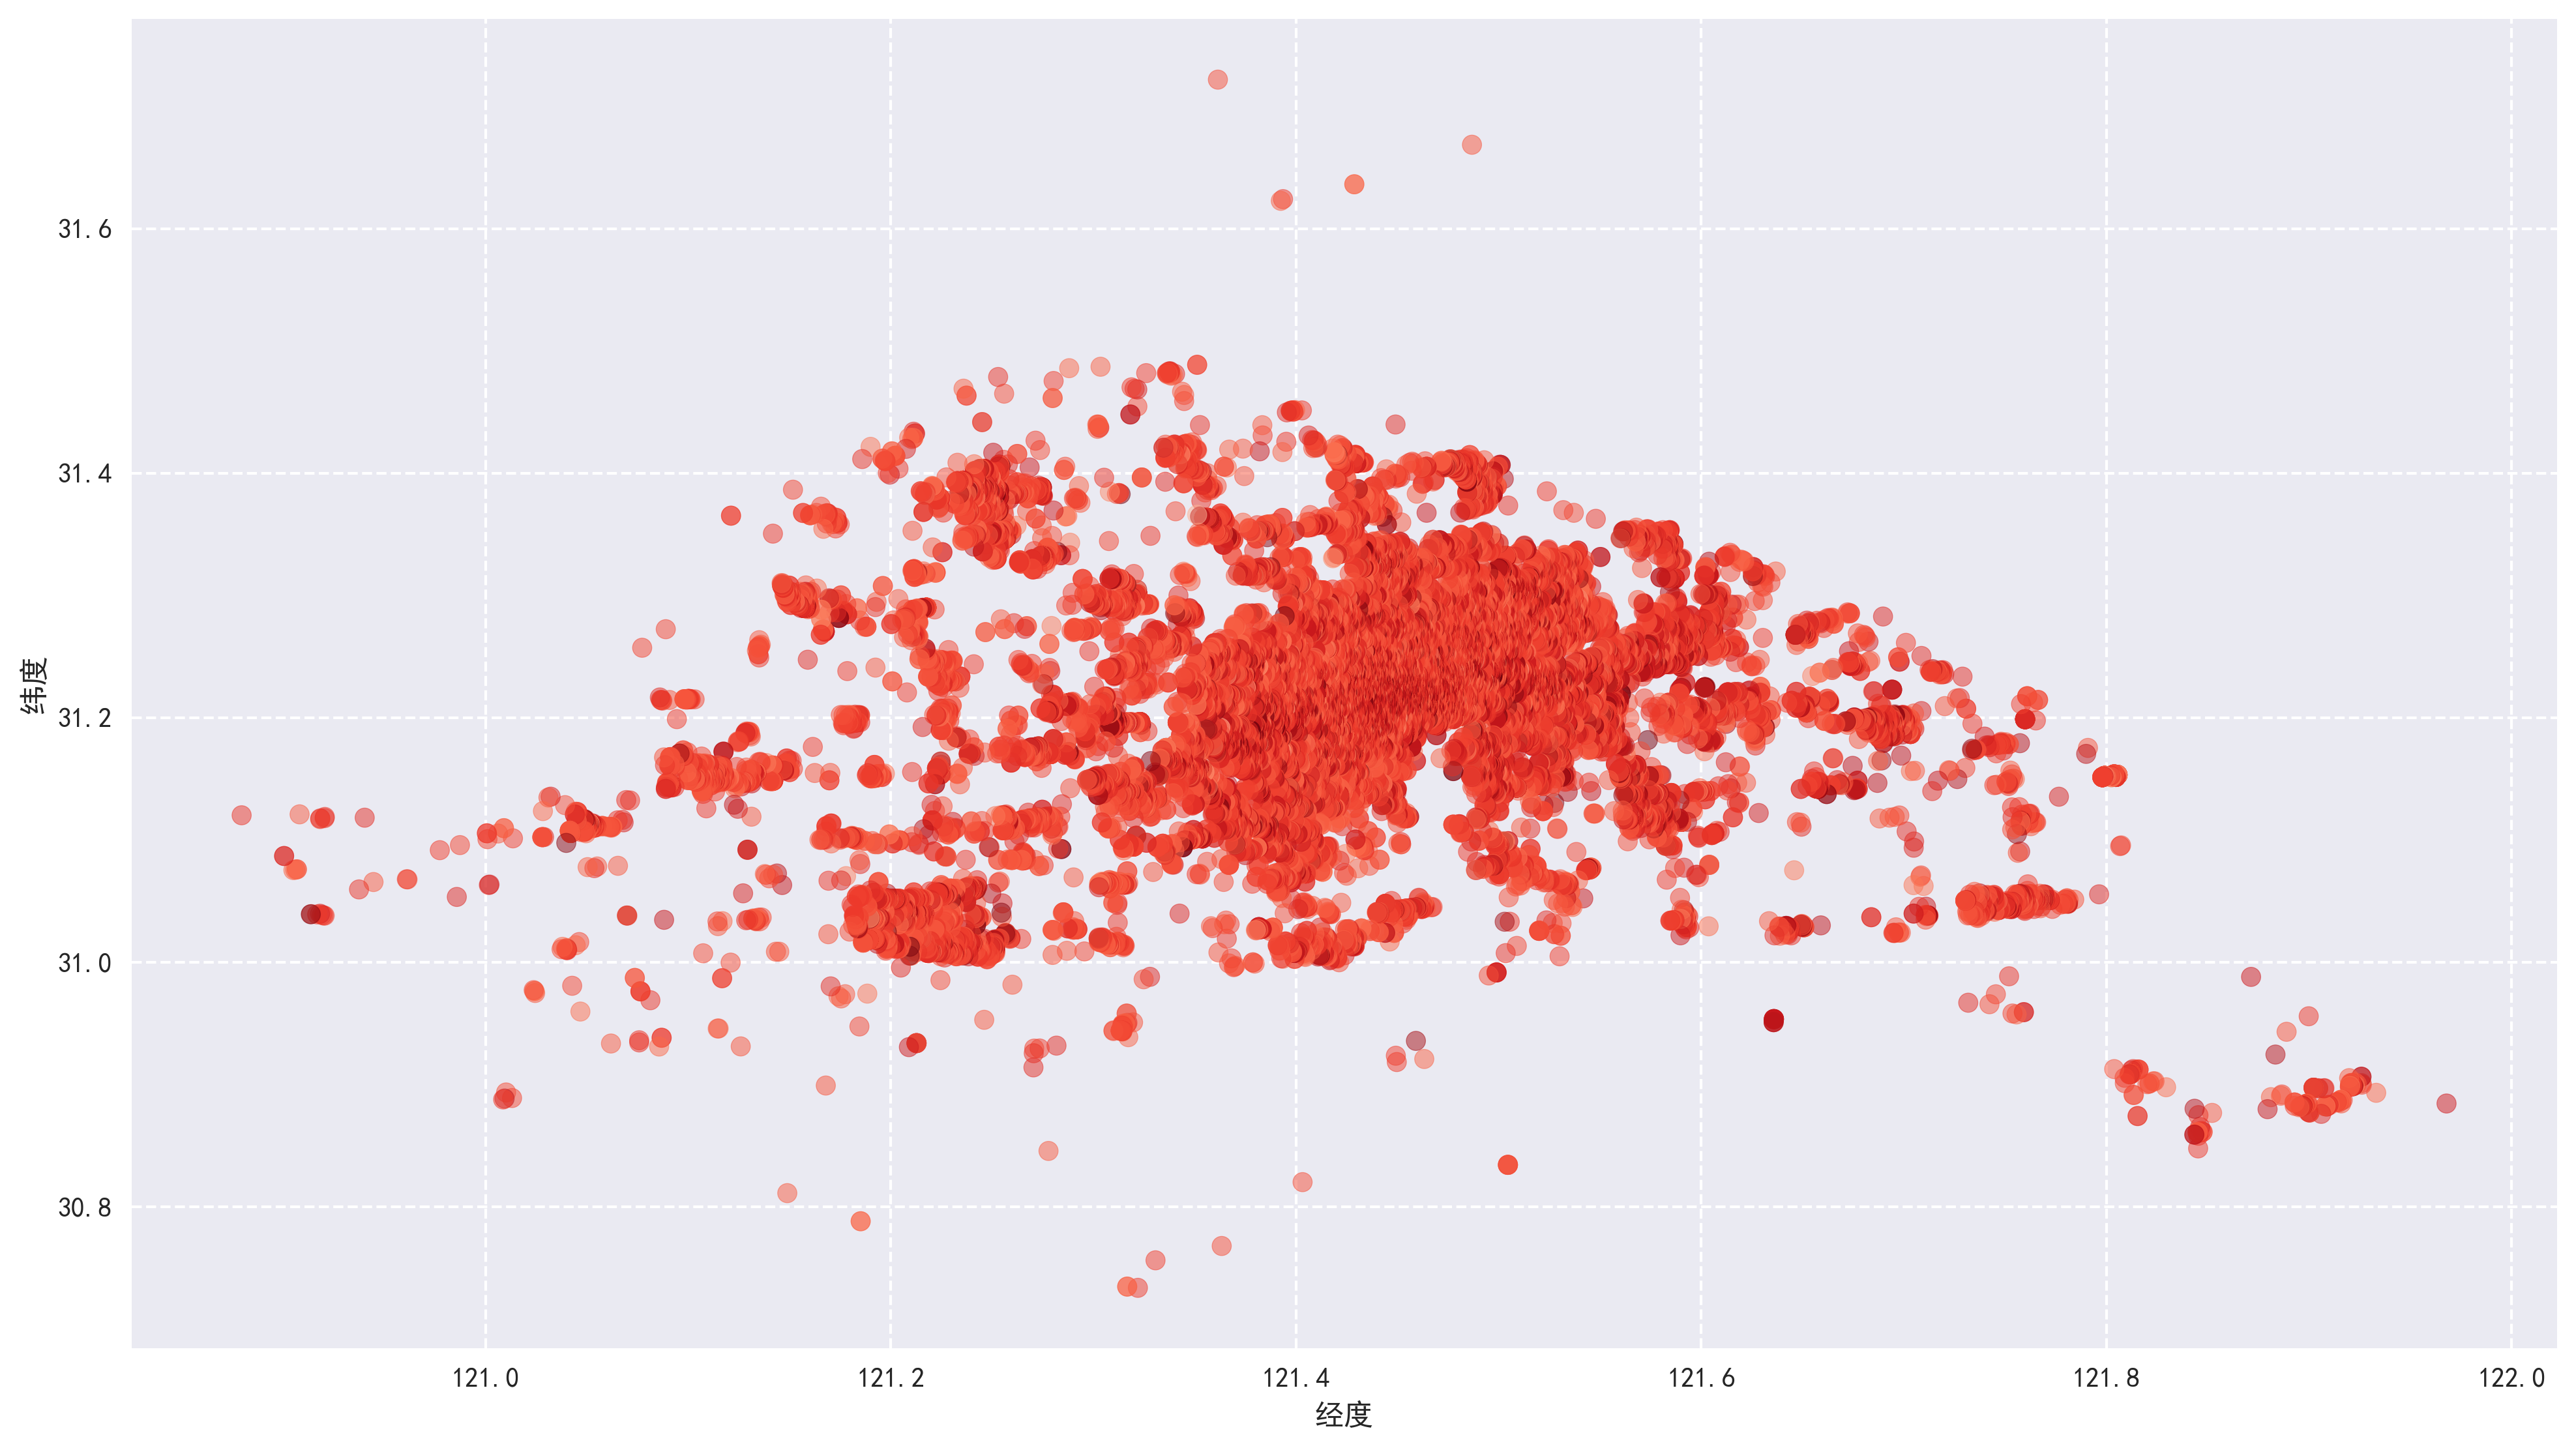

In [42]:
plt.figure(figsize=(16,9),dpi=300)
plt.grid(linestyle='--')

plt.xlabel('经度')
plt.ylabel('纬度')
cc = data01.口味
clist = [i for i in cc]
plt.scatter(data01.Lng,data01.Lat,c=clist,cmap='Reds',s=50,alpha=0.5)

# 模型预测

## 1. 指标函数设定

In [ ]:
y1 = data02['口味']
y2 = np.log(data02['人均消费'])
X = data02.drop(['人均消费', '口味'], axis=1)

In [4]:
def get_best_model_and_accuracy(model, params, X, y, n_jobs=None, verbose=0):
    grid = GridSearchCV(model, params, error_score=0.,
    n_jobs=n_jobs, verbose=verbose)# 如果报错，结果是0
    grid.fit(X, y)
    # 经典的性能指标
    print("Best Accuracy: {}".format(grid.best_score_))
    # 得到最佳准确率的最佳参数
    print("Best Parameters: {}".format(grid.best_params_)) # 拟合的平均时间(秒)
    print("Average Time to Fit (s):{}".format(round(grid.cv_results_['mean_fit_time'].mean(), 3))) # 预测的平均时间(秒)
    # 从该指标可以看出模型在真实世界的性能
    print("Average Time to Score (s):{}".format(round(grid.cv_results_['mean_score_time'].mean(), 3)))


## 2. 模型比较

树模型最优

In [8]:
# tree
tree = DecisionTreeRegressor(random_state=42)
tree_params = {
    'max_depth':[None, 5, 7, 9, 11]
}
for y in [y1, y2]:
    get_best_model_and_accuracy(tree, tree_params, X, y)

Best Accuracy: 0.8279216089887548
Best Parameters: {'max_depth': 7}
Average Time to Fit (s):0.682
Average Time to Score (s):0.015
Best Accuracy: 0.564797104603786
Best Parameters: {'max_depth': 7}
Average Time to Fit (s):0.542
Average Time to Score (s):0.015


In [6]:
lr = LinearRegression()
lr_params = {'fit_intercept': [True, False]}
for y in [y1, y2]:
    # print(y.columns)
    get_best_model_and_accuracy(lr, lr_params, X, y)

Best Accuracy: 0.8162416929674883
Best Parameters: {'fit_intercept': True}
Average Time to Fit (s):0.223
Average Time to Score (s):0.014
Best Accuracy: 0.5734112903869907
Best Parameters: {'fit_intercept': True}
Average Time to Fit (s):0.271
Average Time to Score (s):0.019


### 2.1 最优树模型的有用特征重要性

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y1, random_state=42)
tree = DecisionTreeRegressor(random_state=42, max_depth=7)
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.8366493550658072

In [23]:
pd.DataFrame(tree.feature_importances_, X.columns).sort_values(by=0, ascending=False).head(15)

,0
服务,0.954290
点评数,0.030416
环境,0.007391
类别_助餐,0.003223
类别_火锅,0.001582
Lng,0.000848
类别_浙菜,0.000508
类别_西餐,0.000458
Lat,0.000275
类别_啡厅,0.000256


In [26]:
X.columns

Index(['点评数', '环境', '服务', 'Lng', 'Lat', '类别_亚菜', '类别_助餐', '类别_北菜', '类别_午茶',
       '类别_南菜', '类别_啡厅', '类别_川菜', '类别_州菜', '类别_常菜', '类别_快餐', '类别_料理', '类别_本菜',
       '类别_浙菜', '类别_海鲜', '类别_湘菜', '类别_湾菜', '类别_火锅', '类别_烧烤', '类别_甜点', '类别_疆菜',
       '类别_粤菜', '类别_素菜', '类别_美食', '类别_蟹宴', '类别_西菜', '类别_西餐', '类别_面馆', '类别_龙虾',
       '行政区_ 卢湾区', '行政区_ 嘉定区', '行政区_ 宝山区', '行政区_ 徐汇区', '行政区_ 普陀区', '行政区_ 杨浦区',
       '行政区_ 松江区', '行政区_ 浦东新区', '行政区_ 虹口区', '行政区_ 金山区', '行政区_ 长宁区', '行政区_ 闵行区',
       '行政区_ 闸北区', '行政区_ 青浦区', '行政区_ 静安区', '行政区_ 黄浦区'],
      dtype='object')

### 2.2 类别对口味的影响

In [29]:
data02[['口味', '类别_助餐', '类别_火锅']].corr()

,口味,类别_助餐,类别_火锅
口味,1.000000,-0.033468,0.146611
类别_助餐,-0.033468,1.000000,-0.026505
类别_火锅,0.146611,-0.026505,1.000000


## 3. 特征工程

### 3.1 标准化管道

In [31]:
tree = DecisionTreeRegressor(random_state=42)

tree_pipe = Pipeline([
    ('sc', StandardScaler()),
    ('tree', tree)
])
tree_pipe_params = {
    'tree__max_depth':[None, 1, 3, 5, 7, 9, 11]
}
for y in [y1, y2]:
    get_best_model_and_accuracy(tree_pipe, tree_pipe_params, X, y)

Best Accuracy: 0.8279350617309706
Best Parameters: {'tree__max_depth': 7}
Average Time to Fit (s):0.764
Average Time to Score (s):0.024
Best Accuracy: 0.5648055115074962
Best Parameters: {'tree__max_depth': 7}
Average Time to Fit (s):0.61
Average Time to Score (s):0.022


### 3.2 加入交互项和平方项

In [33]:
tree = DecisionTreeRegressor(random_state=42)

tree_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('sc', StandardScaler()),
    ('tree', tree)
])
tree_pipe_params = {
    'tree__max_depth':[None, 5, 7, 9, 11]
}
for y in [y1, y2]:
    get_best_model_and_accuracy(tree_pipe, tree_pipe_params, X, y)

Best Accuracy: 0.8245398000072933
Best Parameters: {'tree__max_depth': 7}
Average Time to Fit (s):20.351
Average Time to Score (s):0.663


KeyboardInterrupt: 

### 3.3 特征选择

#### 3.3.1 基于统计的特征选择

In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from copy import deepcopy

tree = DecisionTreeRegressor(random_state=42)
k_best = SelectKBest(f_classif)

tree_select = Pipeline([
#     ('poly', PolynomialFeatures(degree=2)),
    ('sc', StandardScaler()),
    ('select', k_best),
    ('tree', tree)
])

tree_select_params = {
    'tree__max_depth':[None, 5, 7, 9, 11],
    "select__k": [5, 7, 10, 20, 30]
}
# for y in [y1, y2]:
get_best_model_and_accuracy(tree_select, tree_select_params, X, y1)

c:\users\13631\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [8] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
c:\users\13631\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\users\13631\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [8] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
c:\users\13631\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\users\13631\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:1

c:\users\13631\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [8] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
c:\users\13631\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\users\13631\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [8] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
c:\users\13631\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
c:\users\13631\appdata\local\programs\python\python38\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:1

Best Accuracy: 0.8286881153193469
Best Parameters: {'select__k': 30, 'tree__max_depth': 7}
Average Time to Fit (s):0.607
Average Time to Score (s):0.027


#### 3.3.2 基于模型的特征选择

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel

select = SelectFromModel(DecisionTreeRegressor())

select_from_pipe = Pipeline([
    ('sc', StandardScaler()),
    ("select", select),
    ("tree", tree)
])

select_from_pipe_params = deepcopy(tree_pipe_params)
select_from_pipe_params.update({
    "select__threshold": [.01, .05, .1, .2, .25, .3, .4, .5, .6, "mean", "median", "2.*mean"],
    'select__estimator__max_depth': [None, 1, 3, 5, 7, 9],
})

print(select_from_pipe_params)
get_best_model_and_accuracy(select_from_pipe, select_from_pipe_params, X, y1)

{'tree__max_depth': [None, 5, 7, 9, 11], 'select__threshold': [0.01, 0.05, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 'mean', 'median', '2.*mean'], 'select__estimator__max_depth': [None, 1, 3, 5, 7, 9]}
Best Accuracy: 0.8279350617309706
Best Parameters: {'select__estimator__max_depth': 1, 'select__threshold': 'median', 'tree__max_depth': 7}
Average Time to Fit (s):0.721
Average Time to Score (s):0.021


#### 3.3.3 交互项和特征选择的合并

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from copy import deepcopy

tree = DecisionTreeRegressor(random_state=42)
k_best = SelectKBest(f_classif)

tree_select = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('sc', StandardScaler()),
    ('select', k_best),
    ('tree', tree)
])

tree_select_params = {
    'tree__max_depth':[None, 5, 7, 9, 11],
    "select__k": [5, 7, 10, 20, 30]
}
# for y in [y1, y2]:
get_best_model_and_accuracy(tree_select, tree_select_params, X, y1)

In [ ]:
{'tree__max_depth': [None, 5, 7, 9, 11], 'select__threshold': [0.01, 0.05, 0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 'mean', 'median', '2.*mean'], 'select__estimator__max_depth': [None, 1, 3, 5, 7, 9]}
Best Accuracy: 0.8579350617309706
Best Parameters: {'select__estimator__max_depth': 1, 'select__threshold': 'median', 'tree__max_depth': 7}
Average Time to Fit (s):0.721
Average Time to Score (s):0.021

In [44]:
# from sklearn.pipeline import Pipeline
# from sklearn.feature_selection import SelectFromModel

# select = SelectFromModel(DecisionTreeRegressor())

pca_pipe = Pipeline([
    ('sc', StandardScaler()),
    ('pca', PCA()),
    ('tree', tree)
])
pca_pipe_params = deepcopy(tree_pipe_params)
pca_pipe_params.update({"pca__n_components": [3, 5, 7, 9]})
get_best_model_and_accuracy(pca_pipe, pca_pipe_params, X, y1)

Best Accuracy: 0.633572898867724
Best Parameters: {'pca__n_components': 5, 'tree__max_depth': 7}
Average Time to Fit (s):0.787
Average Time to Score (s):0.02
